In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!ls 

PredicaoBH.ipynb
dados.xlsx
dados_ia.ipynb
data.csv
dt_preprocessado.csv
dtbh.csv
dtfinal3.csv
map.html
ml
web


# Disponibilizando os dados

In [4]:
dt = pd.read_csv('dtfinal3.csv', sep=";",encoding = 'unicode_escape')

In [5]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1.0,570000.0,3.0,14.0,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2.0,435000.0,2.0,15.0,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1.0,497850.0,1.0,15.0,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0.0,320000.0,1.0,17.0,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2.0,394000.0,1.0,17.0,Santo Antonio,Belo Horizonte,-19.947254,-43.935269


In [6]:
dt.dtypes

Endereco      object
VlrCond        int64
Garagem      float64
Preco        float64
Quarto       float64
M2           float64
Bairro        object
Cidade        object
Latitude     float64
Longitude    float64
dtype: object

In [7]:
dt.max()

VlrCond      1.500000e+06
Garagem      5.000000e+01
Preco        1.300000e+08
Quarto       5.000000e+01
M2           1.500000e+06
Latitude    -1.737312e+01
Longitude   -4.112178e+01
dtype: float64

In [8]:
dt.min()

VlrCond        0.000000
Garagem        0.000000
Preco        450.000000
Quarto         1.000000
M2            14.000000
Latitude     -20.381093
Longitude    -46.507540
dtype: float64

# Tratamento da Base

In [9]:
##CORRIGE IDENTAÇCAO LATITUDE
#dt['Latitude'] = dt['Latitude'].replace({' ','.'},inplace=True)

In [10]:
##CORRIGE IDENTAÇCAO LATITUDE
#dt['Longitude'] = dt['Longitude'].replace({' ','.'},inplace=True)

In [11]:
#dt['Latitude'] = dt['Latitude'].astype('float64')
#dt['Longitude'] = dt['Longitude'].astype('float64')

In [12]:
dt

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1.0,570000.0,3.0,14.0,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2.0,435000.0,2.0,15.0,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1.0,497850.0,1.0,15.0,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0.0,320000.0,1.0,17.0,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2.0,394000.0,1.0,17.0,Santo Antonio,Belo Horizonte,-19.947254,-43.935269
...,...,...,...,...,...,...,...,...,...,...
5907,Avenida Prudente de Morais,0,46.0,24000000.0,1.0,7188.0,Cidade Jardim,Belo Horizonte,-19.947413,-43.948534
5908,Avenida Amazonas 8000,0,0.0,35000000.0,1.0,9420.0,Glalija,Belo Horizonte,-19.937944,-43.999134
5909,Rua Maria Luiza Santiago 200,0,0.0,380000.0,1.0,16153.0,Santa Lucia,Belo Horizonte,-19.974335,-43.949228
5910,Avenida Otacilio Negrao de Lima 01,0,19.0,6500000.0,3.0,1500000.0,Bandeirantes,Belo Horizonte,-19.860980,-43.976840


In [13]:
#remove ultima linha
dt = dt.drop(5911, 0)

In [14]:
dt['Preco'] = dt['Preco'].astype('int32')

In [15]:
dt['Garagem'] = dt['Garagem'].astype('int32')

In [16]:
dt['Quarto'] = dt['Quarto'].astype('int32')

In [17]:
dt['M2'] = dt['M2'].astype('int32')

In [18]:
dt['VlrCond'] = dt['VlrCond'].astype('int32')

In [19]:
df_processado = dt
df_processado = df_processado.drop('Endereco', 1)
df_processado = df_processado.drop('Cidade', 1)
df_processado = df_processado.drop('Latitude', 1)
df_processado = df_processado.drop('Longitude', 1)

In [20]:
df_processado.to_csv('dt_preprocessado.csv',sep=";")

In [21]:
dt.dtypes

Endereco      object
VlrCond        int32
Garagem        int32
Preco          int32
Quarto         int32
M2             int32
Bairro        object
Cidade        object
Latitude     float64
Longitude    float64
dtype: object

In [22]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1,570000,3,14,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2,435000,2,15,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1,497850,1,15,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0,320000,1,17,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2,394000,1,17,Santo Antonio,Belo Horizonte,-19.947254,-43.935269


In [23]:
# Deixando base em memoria (controle)
dt_bkp = dt

In [24]:
#Removendo linhas com preco menores que 9999 
dt = dt[dt['Preco'] > 9999]

In [25]:
#Comparando tamanho da base antiga
len(dt_bkp)

5911

In [26]:
len(dt)

5828

In [27]:
#Validando remoção das linhas menores que 9999
dt.min()

Endereco     Alameda das Palmeiras 95
VlrCond                             0
Garagem                             0
Preco                           10000
Quarto                              1
M2                                 14
Bairro                      Aeroporto
Cidade                 Belo Horizonte
Latitude                   -20.381093
Longitude                   -46.50754
dtype: object

In [28]:
#Verificando os maiores valores
dt.max()

Endereco     Vila da Serra 
VlrCond             1500000
Garagem                  50
Preco             130000000
Quarto                   50
M2                  1500000
Bairro          Xodo Marize
Cidade       Belo Horizonte
Latitude          -17.37312
Longitude        -41.121777
dtype: object

# Atribuindo as primissas desse estudo

In [29]:
## Por definição, cotaremos a base com as seguintes primissas:
## Faremos um estudo para predição de preços de imóveis com até:
##  6 Garagens
##  6 Quartos
##  300 m2
##  R$ 5.000.000,00
##  no município de Belo Horizonte

In [30]:
#Removendo linhas com número de garagens acima de 6
dt = dt[dt['Garagem'] < 7]

In [31]:
#Removendo linhas com número de quartos acima de 6
dt = dt[dt['Quarto'] < 7]

In [32]:
#Removendo linhas com M2 acima de 300
dt = dt[dt['M2'] < 301]

In [33]:
#Removendo linhas com Preços acima de 5000000
dt = dt[dt['Preco'] < 5000001]

In [34]:
#Removendo latitude fora de BH
dt = dt[dt['Latitude'] > -20.1]

In [35]:
#Removendo latitude fora de BH
dt = dt[dt['Latitude'] < -19.7]

In [36]:
#Removendo longitude fora de BH
dt = dt[dt['Longitude'] > -44.06]

In [37]:
#Removendo longitude fora de BH
dt = dt[dt['Longitude'] < -43.7]

In [38]:
#Validando a remoção das linhas acima
dt.min()

Endereco     Avenida Afonso Pena
VlrCond                        0
Garagem                        0
Preco                      16800
Quarto                         1
M2                            14
Bairro                 Aeroporto
Cidade            Belo Horizonte
Latitude              -19.995712
Longitude             -44.059797
dtype: object

In [39]:
dt.max()

Endereco      RuaVitoria 85
VlrCond             1500000
Garagem                   6
Preco               4850000
Quarto                    6
M2                      300
Bairro          Xodo Marize
Cidade       Belo Horizonte
Latitude         -19.756615
Longitude        -43.814201
dtype: object

In [40]:
len(dt)

4974

In [41]:
dtbh = dt
dtbh.to_csv('dtbh.csv',sep=";")

In [42]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1,570000,3,14,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2,435000,2,15,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1,497850,1,15,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0,320000,1,17,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2,394000,1,17,Santo Antonio,Belo Horizonte,-19.947254,-43.935269


# Outliers

In [43]:
## Identificando e tratando outliers
## Outliers são dados discrepantes, em relação a um conjunto de dados. 
## Este tipo de dado pode trazer distorções em nossa análise.

In [44]:
## Para cada coluna, primeiro calcula-se a pontuação Z de cada valor na coluna , Em relação à média e ao desvio padrão da coluna. 
## Em seguida, assume o absoluto da pontuação Z porque a direção não importa , Apenas se estiver abaixo do limite.
## all (axis = 1) garante que, para cada linha, toda a coluna satisfaça a restrição . 
## Finalmente, o resultado dessa condição é usado para indexar o dataframe.

In [45]:
## dtnp = dt
## dtnp = pd.DataFrame(np.random.randn(5828, 10))

## from scipy import stats
## dtnp[(np.abs(stats.zscore(dtnp)) < 10).all(axis=1)]

In [46]:
## precisa fazer um for para que a coluna,varie de 0 a 9
## q = dtnp[coluna].quantile(0.99)
## dtnp[dtnp[coluna] < q]

In [47]:
#O coeficiente de correlação de Pearson é, em geral, considerado mais forte, assim como premissas mais elevadas sobre os dados.
#  No negativo, considera apenas uma dependência linear completa (adequada a uma linha reta) e em (teoria) requer que as 
#  variáveis sejam normalmente distribuídas. É muito frágil para os outliers (pontos únicos longe da norma).
#
#O coeficiente de correlação de classificação kendall deve ser mais eficiente com conjuntos menores. Ele mede a relação
#  monotônica entre duas variáveis, e é um pouco mais lento para calcular O(n^2). Não exige que as variáveis sejam distribuídas
#  normalmente.
#
#O coeficiente de correlação de spearman também mede a relação monotônica entre duas variáveis. A velocidade é mais rápida O
#  (n log(n)). Muitas vezes dá um valor um pouco maior do que Kendalls. Também não exige que as variáveis sejam distribuídas
#  normalmente.

# Estudos das Correlações com os 3 métodos

In [48]:
correlacao =  dt.corr()

In [49]:
correlacao.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.025912,0.019291,0.020653,0.026454,-0.006535,-0.010122
Garagem,0.025912,1.000000,0.640103,0.537495,0.591137,-0.113713,0.012911
Preco,0.019291,0.640103,1.000000,0.456113,0.640686,-0.267844,0.165149
Quarto,0.020653,0.537495,0.456113,1.000000,0.637710,-0.081948,0.044604
M2,0.026454,0.591137,0.640686,0.637710,1.000000,-0.121591,0.065667


In [50]:
correlacao2 = dt.corr(method ='kendall')

In [51]:
correlacao2.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.196870,0.282248,0.327306,0.237401,-0.237905,0.054674
Garagem,0.196870,1.000000,0.572411,0.493412,0.490081,-0.118378,0.010033
Preco,0.282248,0.572411,1.000000,0.427689,0.517072,-0.196535,0.118557
Quarto,0.327306,0.493412,0.427689,1.000000,0.594268,-0.097956,0.042551
M2,0.237401,0.490081,0.517072,0.594268,1.000000,-0.103541,0.057121


In [52]:
correlacao3 =  dt.corr(method="spearman")

In [53]:
correlacao3.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.239218,0.358890,0.398658,0.309181,-0.347210,0.082566
Garagem,0.239218,1.000000,0.706640,0.556528,0.609877,-0.159419,0.012305
Preco,0.358890,0.706640,1.000000,0.541891,0.706505,-0.294890,0.176519
Quarto,0.398658,0.556528,0.541891,1.000000,0.714139,-0.134166,0.056187
M2,0.309181,0.609877,0.706505,0.714139,1.000000,-0.154251,0.085769


Text(0.5, 1.0, 'Correlação Pearson')

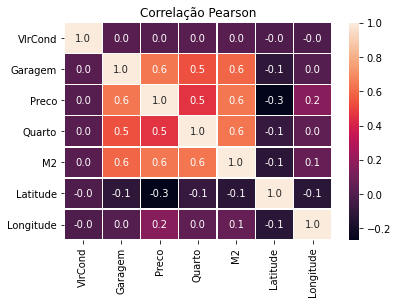

In [54]:
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.4)
plot
plt.title ("Correlação Pearson")

Text(0.5, 1.0, 'Correlação Kendall')

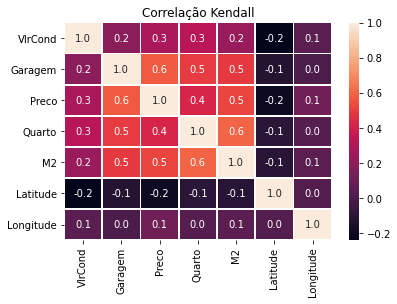

In [55]:
plot = sns.heatmap(correlacao2, annot = True, fmt=".1f", linewidths=.6)
plot
plt.title ("Correlação Kendall")

Text(0.5, 1.0, 'Correlação Spearman')

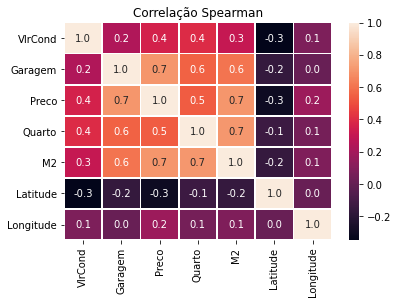

In [56]:
plot = sns.heatmap(correlacao3, annot = True, fmt=".1f", linewidths=.6)
plot
plt.title ("Correlação Spearman")

In [57]:
## Visualizando as correlações com os 3 metodos

In [58]:
correlacao["Preco"].sort_values(ascending=False)

Preco        1.000000
M2           0.640686
Garagem      0.640103
Quarto       0.456113
Longitude    0.165149
VlrCond      0.019291
Latitude    -0.267844
Name: Preco, dtype: float64

array([[<AxesSubplot:xlabel='Preco', ylabel='Preco'>,
        <AxesSubplot:xlabel='M2', ylabel='Preco'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Preco'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Preco'>],
       [<AxesSubplot:xlabel='Preco', ylabel='M2'>,
        <AxesSubplot:xlabel='M2', ylabel='M2'>,
        <AxesSubplot:xlabel='Quarto', ylabel='M2'>,
        <AxesSubplot:xlabel='Garagem', ylabel='M2'>],
       [<AxesSubplot:xlabel='Preco', ylabel='Quarto'>,
        <AxesSubplot:xlabel='M2', ylabel='Quarto'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Quarto'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Quarto'>],
       [<AxesSubplot:xlabel='Preco', ylabel='Garagem'>,
        <AxesSubplot:xlabel='M2', ylabel='Garagem'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Garagem'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Garagem'>]], dtype=object)

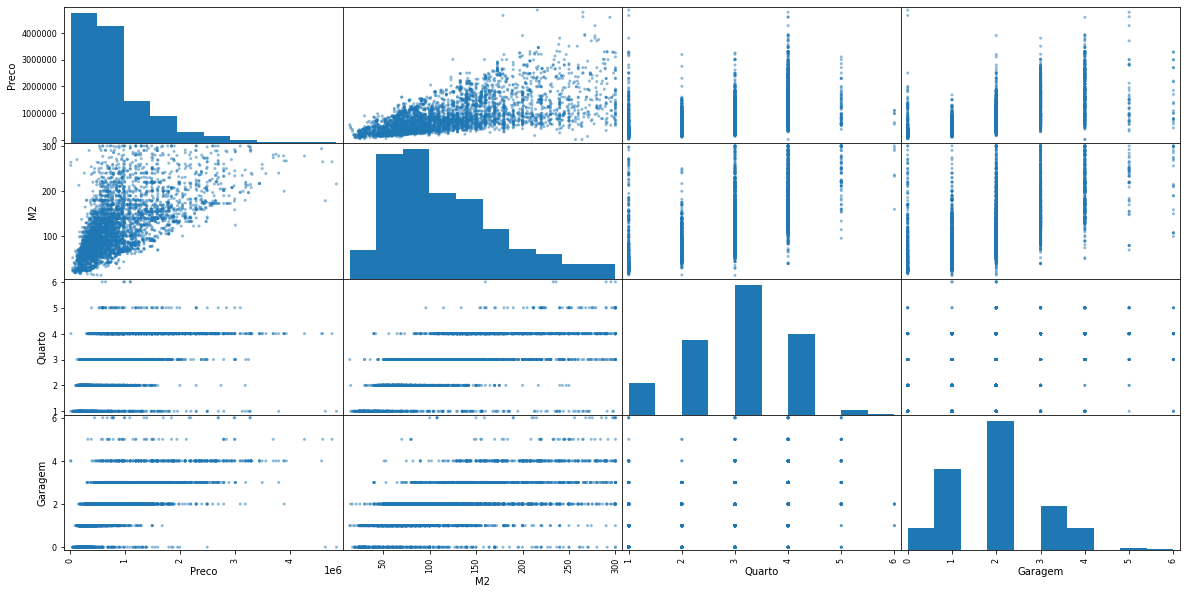

In [59]:
from pandas.plotting import scatter_matrix

attributes = ["Preco", "M2", "Quarto", "Garagem"]
scatter_matrix(dt[attributes], figsize=(20, 10))


In [60]:
correlacao2["Preco"].sort_values(ascending=False)

Preco        1.000000
Garagem      0.572411
M2           0.517072
Quarto       0.427689
VlrCond      0.282248
Longitude    0.118557
Latitude    -0.196535
Name: Preco, dtype: float64

array([[<AxesSubplot:xlabel='Preco', ylabel='Preco'>,
        <AxesSubplot:xlabel='M2', ylabel='Preco'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Preco'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Preco'>],
       [<AxesSubplot:xlabel='Preco', ylabel='M2'>,
        <AxesSubplot:xlabel='M2', ylabel='M2'>,
        <AxesSubplot:xlabel='Quarto', ylabel='M2'>,
        <AxesSubplot:xlabel='Garagem', ylabel='M2'>],
       [<AxesSubplot:xlabel='Preco', ylabel='Quarto'>,
        <AxesSubplot:xlabel='M2', ylabel='Quarto'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Quarto'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Quarto'>],
       [<AxesSubplot:xlabel='Preco', ylabel='Garagem'>,
        <AxesSubplot:xlabel='M2', ylabel='Garagem'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Garagem'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Garagem'>]], dtype=object)

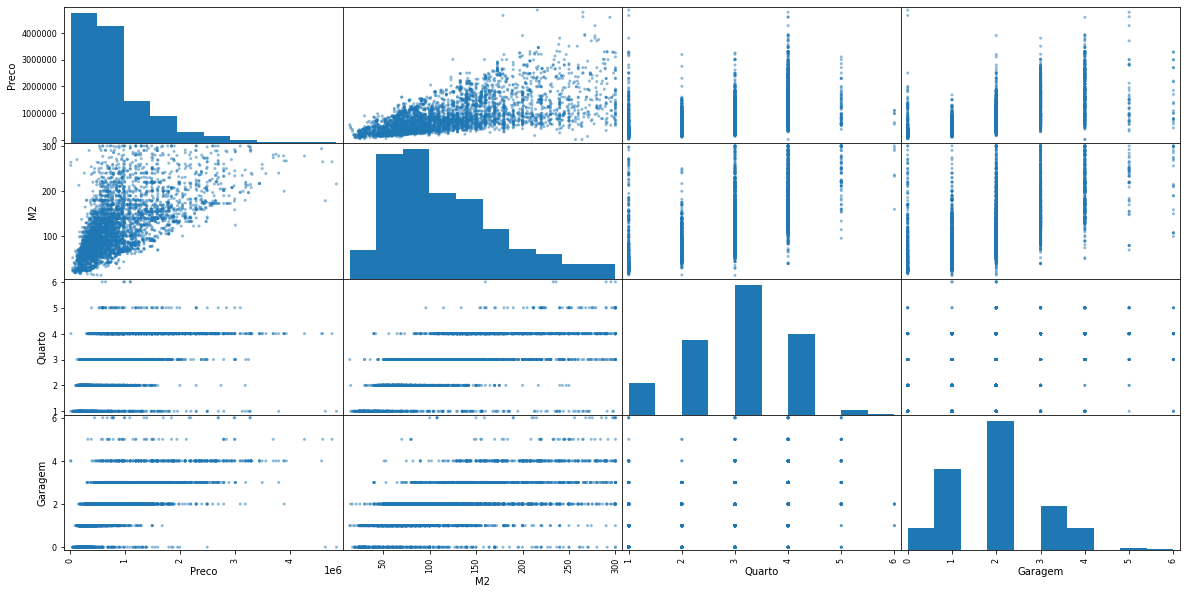

In [61]:
from pandas.plotting import scatter_matrix

attributes = ["Preco", "M2", "Quarto", "Garagem"]
scatter_matrix(dt[attributes], figsize=(20, 10))


In [62]:
correlacao3["Preco"].sort_values(ascending=False)

Preco        1.000000
Garagem      0.706640
M2           0.706505
Quarto       0.541891
VlrCond      0.358890
Longitude    0.176519
Latitude    -0.294890
Name: Preco, dtype: float64

array([[<AxesSubplot:xlabel='Preco', ylabel='Preco'>,
        <AxesSubplot:xlabel='M2', ylabel='Preco'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Preco'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Preco'>],
       [<AxesSubplot:xlabel='Preco', ylabel='M2'>,
        <AxesSubplot:xlabel='M2', ylabel='M2'>,
        <AxesSubplot:xlabel='Quarto', ylabel='M2'>,
        <AxesSubplot:xlabel='Garagem', ylabel='M2'>],
       [<AxesSubplot:xlabel='Preco', ylabel='Quarto'>,
        <AxesSubplot:xlabel='M2', ylabel='Quarto'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Quarto'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Quarto'>],
       [<AxesSubplot:xlabel='Preco', ylabel='Garagem'>,
        <AxesSubplot:xlabel='M2', ylabel='Garagem'>,
        <AxesSubplot:xlabel='Quarto', ylabel='Garagem'>,
        <AxesSubplot:xlabel='Garagem', ylabel='Garagem'>]], dtype=object)

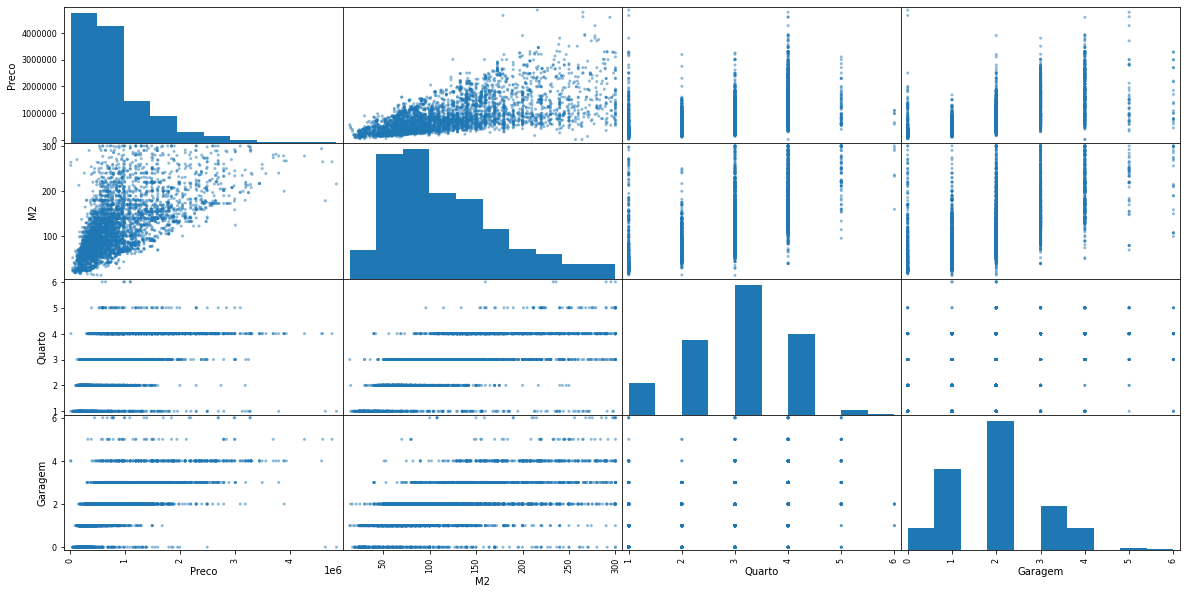

In [63]:
from pandas.plotting import scatter_matrix

attributes = ["Preco", "M2", "Quarto", "Garagem"]
scatter_matrix(dt[attributes], figsize=(20, 10))


In [64]:
# !pip install geopandas 

In [65]:
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
#import matplotlib.pyplot as plt

In [66]:
#scatter_plot = plt.scatter(dtlimpo['Longitude'], dtlimpo['Latitude'], alpha=0.5 )
#plt.show()

In [67]:
dt.sort_values('Preco')

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
5043,Rua Paraiba,0,4,16800,1,257,Savassi,Belo Horizonte,-19.926285,-43.930918
5074,Rua Tome de Souza,1700,4,20000,4,264,Savassi,Belo Horizonte,-19.938824,-43.927445
110,Rua da Bahia,0,0,50000,1,30,Centro,Belo Horizonte,-19.915178,-43.934765
572,Rua Tome de Souza 830,0,0,54000,1,53,Savassi,Belo Horizonte,-19.938824,-43.927445
37,Rua Sao Paulo 1071,0,0,55000,1,25,Centro,Belo Horizonte,-19.914782,-43.938801
...,...,...,...,...,...,...,...,...,...,...
5189,Rua Goncalves Dias 865,0,4,4579786,4,294,Funcionarios,Belo Horizonte,-19.931185,-43.937641
5078,Rua Piaui 883,0,5,4600000,4,265,Funcionarios,Belo Horizonte,-19.938506,-43.928770
4374,Avenida Barbacena 600,0,0,4648557,1,179,Santo Agostinho,Belo Horizonte,-19.926273,-43.951787
5079,Rua Piaui,1750,5,4770000,4,265,Funcionarios,Belo Horizonte,-19.938506,-43.928770


In [68]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4974 entries, 0 to 5244
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Endereco   4974 non-null   object 
 1   VlrCond    4974 non-null   int32  
 2   Garagem    4974 non-null   int32  
 3   Preco      4974 non-null   int32  
 4   Quarto     4974 non-null   int32  
 5   M2         4974 non-null   int32  
 6   Bairro     4974 non-null   object 
 7   Cidade     4974 non-null   object 
 8   Latitude   4974 non-null   float64
 9   Longitude  4974 non-null   float64
dtypes: float64(2), int32(5), object(3)
memory usage: 330.3+ KB


In [69]:
dt.describe()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
count,4.974000e+03,4974.000000,4.974000e+03,4974.000000,4974.000000,4974.000000,4974.000000
mean,1.529265e+03,1.918376,8.256973e+05,2.849015,117.304584,-19.918430,-43.947920
std,3.243988e+04,1.072372,6.300000e+05,0.959633,61.887679,0.043643,0.024348
min,0.000000e+00,0.000000,1.680000e+04,1.000000,14.000000,-19.995712,-44.059797
25%,0.000000e+00,1.000000,3.886250e+05,2.000000,70.000000,-19.946995,-43.966732
50%,3.500000e+02,2.000000,6.490000e+05,3.000000,100.000000,-19.929576,-43.944156
75%,7.090000e+02,2.000000,1.036277e+06,4.000000,150.750000,-19.902339,-43.930459
max,1.500000e+06,6.000000,4.850000e+06,6.000000,300.000000,-19.756615,-43.814201


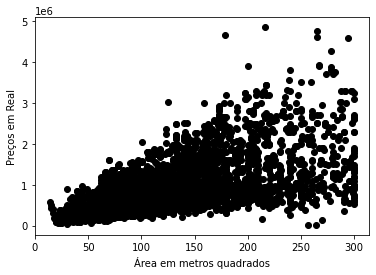

In [70]:
# Pontos do Gráfico na côr Preta (c = 'k')
plt.scatter(dt['M2'], dt['Preco'], c='k')

plt.ylabel("Preços em Real")
plt.xlabel("Área em metros quadrados")

plt.show()

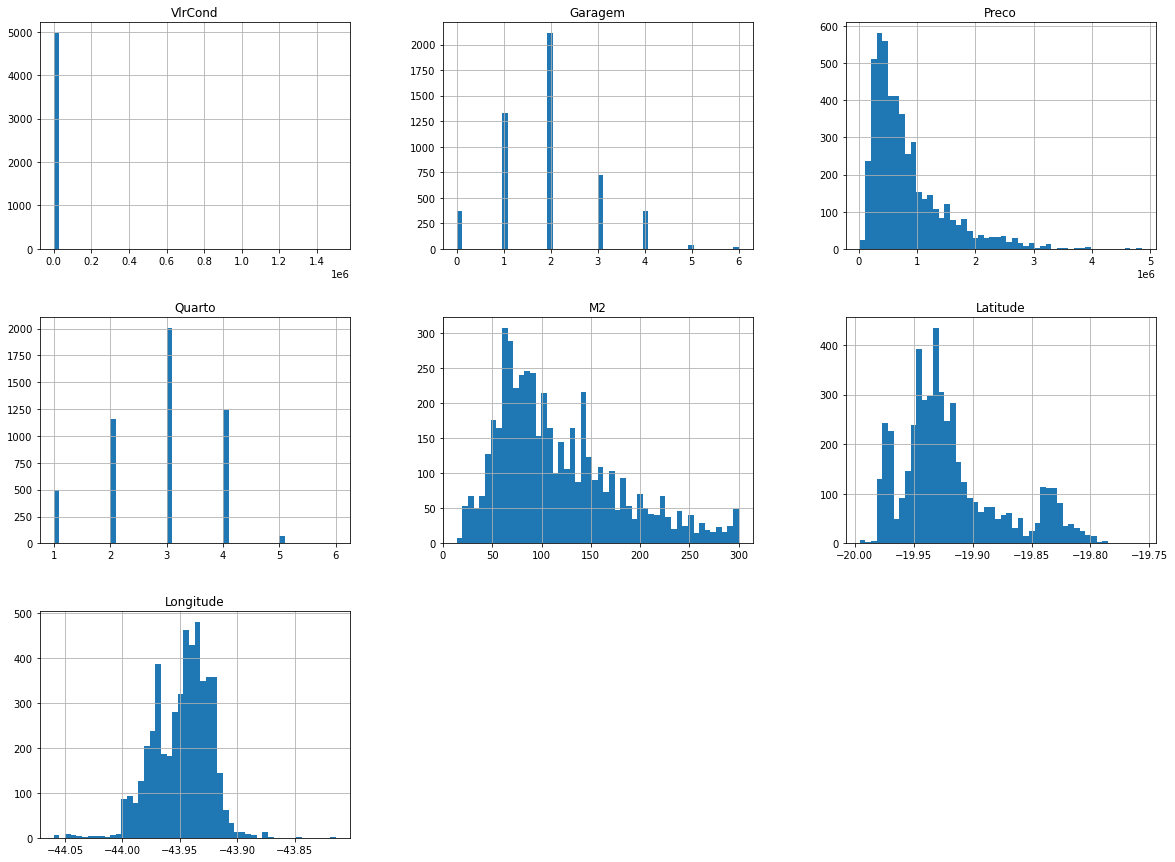

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
dt.hist(bins=50, figsize=(20,15))
plt.show()

In [72]:
# Para esse processo funcionar, precisamos transformar os campos de int32 em float64

# Criando um set de teste

In [ ]:
#import numpy as np

In [ ]:
dtt = dt

In [ ]:
# para o resultado do resultado desse notebook ser idêntico, toda vez que rodar
np.random.seed(42)

In [ ]:
# Apenas para ilustração. Sklearn fará o train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(dt, 0.2)
len(train_set)

In [ ]:
len(test_set)

In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
import hashlib

In [ ]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [ ]:
dt_with_id = dt.reset_index()   # adiciona uma coluna de index
train_set, test_set = split_train_test_by_id(dt_with_id, 0.2, "index")

In [ ]:
dt_with_id["id"] = dt["Longitude"] * 1000 + dt["Latitude"]
train_set, test_set = split_train_test_by_id(dt_with_id, 0.2, "id")

In [ ]:
test_set.head()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dt, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

# Localização dos Imóveis utilizados no estudo

In [ ]:
dt.plot(kind="scatter", x="Longitude", y="Latitude")

In [ ]:
dt.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

# Plotagem de mapas 

In [ ]:
#!pip install folium

In [ ]:
import folium

In [ ]:
mapa = folium.Map(location=[-19.9058278,-44.0005287])
mapa

In [ ]:
#Estilos diferentes
folium.Map(
    location=[-19.9058278,-44.0005287],
    tiles='Stamen Toner',
)

In [ ]:
folium.Map(
    location=[-19.9058278,-44.0005287],
    tiles='Stamen Terrain',
)

In [ ]:
from folium import plugins

In [ ]:
dt.info()

In [ ]:
#Colocando as coordenadas para a geração do gráfico
coordenadas=[]
for Latitude,Longitude in zip(dt.Latitude.values[:5922],dt.Longitude.values[:5922]):
  coordenadas.append([Latitude,Longitude])

In [ ]:
coordenadas

In [ ]:
import folium
mapit = None

latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
for coord in latlon:
    mapit = folium.Map( location=[ coord[0], coord[1] ] )

mapit.save( 'map.html')

In [ ]:
# Adicionando os registros no mapa de calor:
# 1 - Será criado um totalizador por bairro para saber quantidade de imoveis disponiveis
# 2 - Identificação de maior valor para o menor, por latitude x Longitude
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [ ]:
dt['Latitude']

In [ ]:
# inclusão de marcas nos locais dos imóveis
import folium
mapit = folium.Map(location=[-19.9058278,-44.0005287], zoom_start=11 )
for _, Latitude in dt.iterrows():
    # print(dt['Longitude'])
    # print(Latitude.Latitude)
    lat = Latitude.Latitude
    lng = Latitude.Longitude
    folium.Marker(
        location=[lat,lng],
    ).add_to(mapit)

mapit

# Análise do modelo

In [ ]:
# #Início dos estudos
# labels = ['VlrCond', 'Garagem', 'Preco', 'Quarto', 'M2', 'Bairro']

# #men_means = [20, 35, 30, 35, 27]
# #women_means = [25, 32, 34, 20, 25]
# #men_std = [2, 3, 4, 1, 2]
# #women_std = [3, 5, 2, 3, 3]
# width = 0.35       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()

# ax.bar(labels, dt['VlrCond'], width, yerr=dt['VlrCond'], label='VlrCond')
# #ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
# #       label='Women')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

# plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
dt.dtypes

In [ ]:
dt

In [ ]:
dt.head()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
dt_2 = dt.copy()

In [ ]:
temp_bairro = pd.get_dummies(dt['Bairro'])

In [ ]:
dt_process =pd.concat([dt, temp_bairro], axis=1)

#SALVAR CSV PRE PROCESSADO
dt_process.to_csv("dt_preprocessado.csv")

In [ ]:
dt_x = dt.drop('Bairro', 1)

In [ ]:
dt_x = pd.concat([dt_x, temp_bairro], axis=1)

In [ ]:
dt_x.head()

In [ ]:
y = dt['Preco']
x = dt_x

In [ ]:
x = x.drop('Endereco', 1)

In [ ]:
x = x.drop('Cidade', 1)

In [ ]:
x = x.drop('Latitude', 1)

In [ ]:
x = x.drop('Longitude', 1)

In [ ]:
x

In [ ]:
x_bkp = x

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 2 )

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x, y)

In [ ]:
y_pred = linreg.predict(x_test)

In [ ]:
y_test.value_counts()

In [ ]:
df_new_y = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [ ]:
pd.crosstab(df_new_y['y_test'], df_new_y['y_pred'], margins=True)

In [ ]:
y_test

In [ ]:
plot_confusion_matrix(linreg, x_test, y_test, cmap='Blues');

In [ ]:
plt.plot(x, y, '.', alpha = 0.1)
plt.plot(x, y_pred, '.', alpha = 0.5)
plt.show()

In [ ]:
x = dt_x.linspace(-10, 10, 1000)
y = dt_x.exp(x)/(1+dt_x.exp(x))

plt.figure(figsize = (10, 3), dpi = 100)

plt.plot(x, y, '.', alpha = 0.15)
plt.show()

In [ ]:
# random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.metrics import r2_score 

In [ ]:
## df = pd.read_csv('dt_preprocessado.csv', sep=";",encoding = 'unicode_escape')
df = pd.read_csv('dtbh.csv', sep=";",encoding = 'unicode_escape')

In [ ]:
df

In [ ]:
temp_bairro = pd.get_dummies(df['Bairro'])
df = df.drop('Bairro', axis = 1)
df =pd.concat([df, temp_bairro], axis=1)

df

In [ ]:
df = df.drop('Endereco', axis = 1)

In [ ]:
df = df.drop('Cidade', axis = 1)

In [ ]:
x = df.drop('Preco', axis = 1)

In [ ]:
y = df['Preco']

In [ ]:
y

In [ ]:
model = RandomForestRegressor( n_estimators = 200, n_jobs = -1 )

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 2 )

In [ ]:
x_train.values

In [ ]:
model.fit( x_train, y_train )

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
R2 = r2_score(y_test,y_pred)
print("R2 " , (R2))


In [ ]:

MSE = mean_squared_error(y_test,y_pred)
print("MSE " , MSE)

In [ ]:
result = model.score( x_test, y_test )

In [ ]:
result